# Fourier Examples

## Introduction

Fourier series can be used to represent periodic functions as a sum of sine and cosine terms with different amplitudes and freqencies. For example, a function $f(t)$, with period $T$, can be written:

\begin{eqnarray}
\begin{array}{c}
f(t) = {a_0} + \sum\limits_{n = 1}^\infty  {{a_n}\cos \left( {\frac{{2n\pi t}}{T}} \right) + {b_n}\sin \left( {\frac{{2n\pi t}}{T}} \right).}
\end{array}
\end{eqnarray}

The coefficients $a_0$, $a_n$ and $b_n$ may be determined as follows:

\begin{eqnarray}
\begin{array}{c}
\begin{aligned}
{a_0} &= \frac{1}{T}\int\limits_0^T {f(t)\,dt} \\
{a_n} &= \frac{2}{T}\int\limits_0^T {f(t)\cos \left( {\frac{{2n\pi t}}{T}} \right)\,dt} \\
{b_n} &= \frac{2}{T}\int\limits_0^T {f(t)\sin \left( {\frac{{2n\pi t}}{T}} \right)\,dt}. 
\end{aligned}
\end{array}
\end{eqnarray}

The function here is:

\begin{eqnarray}
\begin{array}{c}
\begin{aligned}
f(t) &= 50t + 10 \,\,{\rm{ if}}\,\,{\rm{ }} -0.2 < t <  0.0,\\
     &= 2\,\,{\rm{ if}}\,\,{\rm{ }} 0.0 < t < 0.2.
\end{aligned}
\end{array}
\end{eqnarray}

We have $T = 0.4$. The graph of $f(t)$ is shown below.

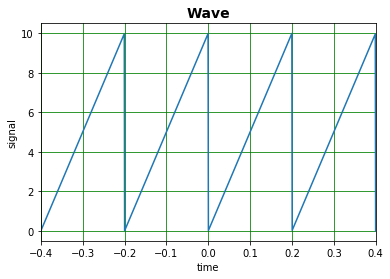

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from matplotlib import cm
import sympy as sp
from IPython.display import display, Markdown, Latex
#
# define the flat triangle function
def SawTooth(t, T):
    '''
    Saw tooth function centered on zero with period T
    '''
    lArr = len(t)
    Tarr = T*np.ones(lArr)
    arg = t - ((t - T/2)//T)*T - T
    boolA = np.logical_and(-Tarr < arg, arg < 0.0)
    boolB = np.logical_and(0*Tarr < arg, arg < Tarr)
    fA = 10 + 50*arg
    fB = 50*arg
    #
    f = boolA*fA + boolB*fB
    #
    return f
#
T = 0.4
nT = 1000
tBot = -0.4
tTop = 0.4
tArr = np.linspace(tBot, tTop, nT)
fArr = np.zeros(nT)
fArr = SawTooth(tArr, T)
plt.plot(tArr, fArr)
plt.title("Wave", size = 14, weight = "bold")
plt.xlabel("time")
plt.ylabel("signal")
plt.axis([tBot, tTop, -0.5, 10.5])
plt.grid(color = 'g')
plt.savefig("SawTooth.png")

Calculate $a_0$:

In [2]:
t = sp.Symbol("t")
a0 = 1/T*(sp.integrate(50*t + 10, (t, -T/2, 0.0)) + sp.integrate(50*t, (t, 0.0, T/2)))
display(Markdown("$a_0 = " + sp.latex(a0) + "$"))

$a_0 = 5.0$

We have $a_0 = 5$.

Determine the expression for the $a_n$:

In [3]:
n = sp.Symbol("n")
an = 2/T*(sp.integrate((50*t + 10)*sp.cos(2*n*sp.pi*t/T), (t, -T/2, 0.0)) + 
          sp.integrate(50*t*sp.cos(2*n*sp.pi*t/T), (t, 0.0, T/2)))
display(Markdown("$a_n = " + sp.latex(sp.simplify(an)) + "$"))

$a_n = \begin{cases} \frac{10.0 \sin{\left(\pi n \right)}}{\pi n} & \text{for}\: n > -\infty \wedge n < \infty \wedge n \neq 0 \\10.0 & \text{otherwise} \end{cases}$

That is $a_n = \frac{10}{n \pi} \sin n \pi$, which is zero for all values of $n$.

Determine the expression for the $b_n$.:

In [4]:
bn = 2/T*(sp.integrate((50*t + 10)*sp.sin(2*n*sp.pi*t/T), (t, -T/2, 0.0)) + 
          sp.integrate(50*t*sp.sin(2*n*sp.pi*t/T), (t, 0.0, T/2)))
display(Markdown("$b_n = " + sp.latex(sp.simplify(bn)) + "$"))

$b_n = \begin{cases} \frac{- 10.0 \cos{\left(\pi n \right)} - 10.0 + \frac{20.0 \sin{\left(\pi n \right)}}{\pi n}}{\pi n} & \text{for}\: n > -\infty \wedge n < \infty \wedge n \neq 0 \\0 & \text{otherwise} \end{cases}$

We have $b_n = \frac{20}{n^2 \pi^2} \sin n \pi - \frac{10}{n \pi}\left( 1 + \cos n \pi \right)$.

Work out the numerical values of the coefficients and then plot the sum of the Fourier series.

 
Fourier coefficients for saw tooth.
n	 an	 bn
0	 5.000000	 0.000000
1	 -0.000000	 0.000000
2	 -0.000000	 -3.183099
3	 -0.000000	 0.000000
4	 -0.000000	 -1.591549
5	 -0.000000	 0.000000
6	 -0.000000	 -1.061033
7	 -0.000000	 0.000000
8	 -0.000000	 -0.795775
9	 -0.000000	 0.000000
 


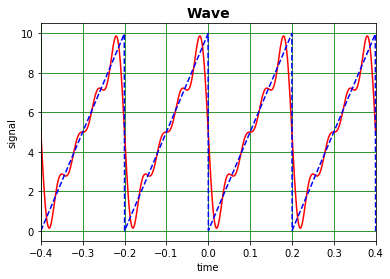

In [5]:
def coeffSawTooth(N, T):
    '''
    Fourier coefficients for saw tooth. 
    '''
    a = np.zeros(N)
    b = np.zeros(N)
    a[0] = 5.0
    for n in range(1, N):
        a[n] = 10*np.sin(2*np.pi*n)
        b[n] = 20*np.sin(np.pi*n)/(np.pi**2*n**2) - 10/(np.pi*n)*(1 + np.cos(np.pi*n))
    return a, b
#
def fsSum(a, b, N, T, t):
    '''
    Sum of Fourier Series
    '''
    F = a[0]
    for n in range(1, N):
        F = F + a[n]*np.cos(2*n*np.pi*t/T) + b[n]*np.sin(2*n*np.pi*t/T)
    return F
#
N = 10
caSawTooth, cbSawTooth = coeffSawTooth(N, T)
np.set_printoptions(precision = 2)
print(" ")
print("Fourier coefficients for saw tooth.") 
print("n\t an\t bn")
for n in range(0, N):
    print("{:d}\t {:.6f}\t {:.6f}".format(n, caSawTooth[n], cbSawTooth[n]))
#
tArrS = np.linspace(tBot, tTop, nT)
fArrS = np.zeros(nT)
for i in range(0, nT):
    fArrS[i] = fsSum(caSawTooth, cbSawTooth, N, T, tArr[i])
print(" ")
plt.plot(tArrS, fArrS, color = 'r', linestyle = '-')
plt.plot(tArr, fArr, color = 'b', linestyle = '--')
plt.title("Wave", size = 14, weight = "bold")
plt.xlabel("time")
plt.ylabel("signal")
plt.axis([tBot, tTop, -0.5, 10.5])
plt.grid(color = 'g')
plt.savefig("SawToothFourier.png")